# Session 3 – Unsupervised Learning: Dimensionality Reduction & Clustering

By the end of this notebook, we will:
- Understand unsupervised learning and how it differs from supervised tasks
- Apply Principal Component Analysis (PCA) for dimensionality reduction and visualization
- Try out other methods such us t-SNE and UMAP
- Perform K-Means clustering to find patterns in unlabeled data
- Interpret cluster assignments and compare them with true labels (if available)
- Explore hierarchical clustering

We’ll reuse the **Breast Cancer dataset**.

### Load the Breast Cancer dataset

We’ll ignore labels during clustering — but later compare clusters to the true diagnosis.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target  # ground truth, used only for evaluation

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Part 1: Dimensionality Reduction

### Principal Component Analysis (PCA)

PCA transforms correlated features into a smaller set of uncorrelated components capturing the most variance.

In order to perform PCA we must scale the data first.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

X_pca.shape


(569, 30)

In [3]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [4]:
X_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

### Variance explained for each of the principal components

In [5]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

### Visualize the first two components

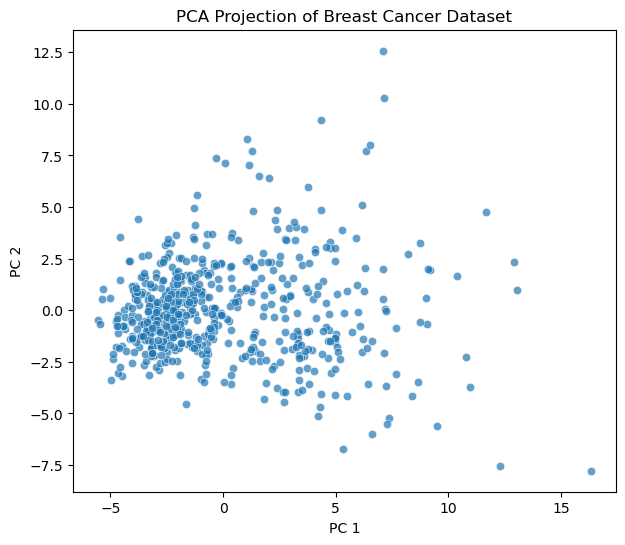

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Projection of Breast Cancer Dataset")
plt.show()

### Exercise 1: Visualize the explained variance as a cumulative function

1. Plot as a line plot the Cumulative Explained Variance vs the number of PCA Components.
2. How many component explain 90% of the variance?
3. How many components would you select? 

*Hints: Use np.cumsum()*

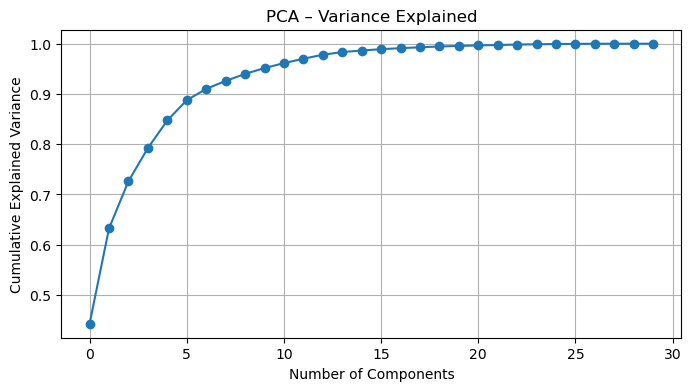

In [8]:
import numpy as np

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.grid(True)
plt.show()


### Exercise 2: Visualize the first two components but colored by the target value.

- Compare the range of values of the x-axis and the y-axis. Does it make sense?
- Is PCA able to separate between the two classes (malignant or healthy)?
- Compute the PCA again but setting the parameter `n_components=2`. Do you see any difference?

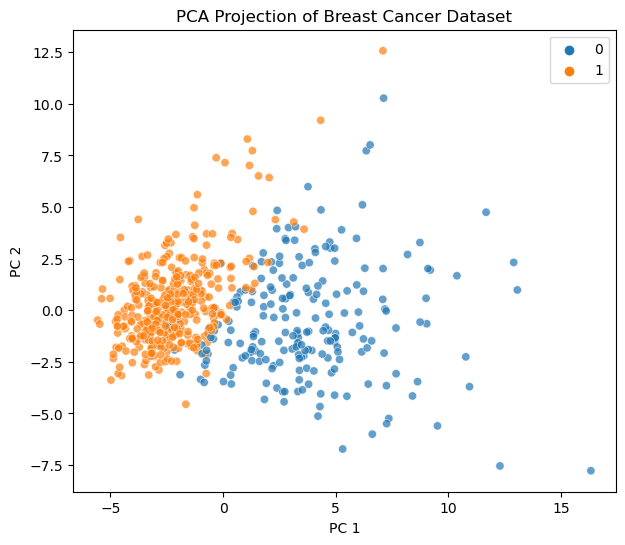

In [9]:
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Projection of Breast Cancer Dataset")
plt.show()

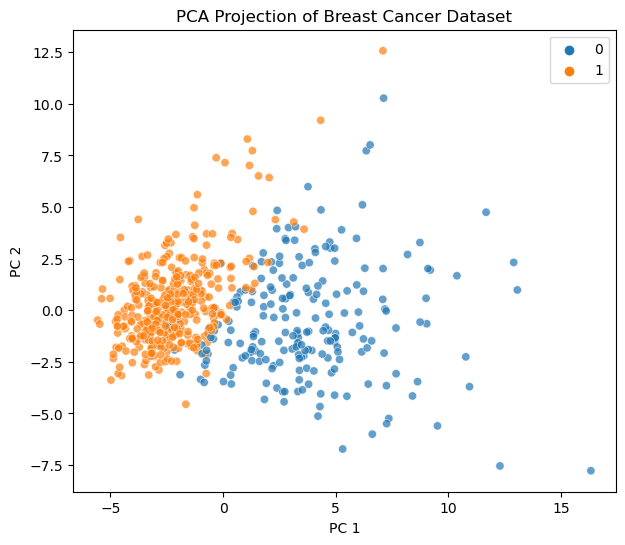

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Projection of Breast Cancer Dataset")
plt.show()

### Exercise 3: Plot the PCA component loadings.

Plotting the loadings helps us see which original features contribute the most. 

*Hints:* Use pca.compontents_ to get the weights for each feature.

In [15]:
print(pca.components_)
print(pca.components_.shape)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
(2, 30)


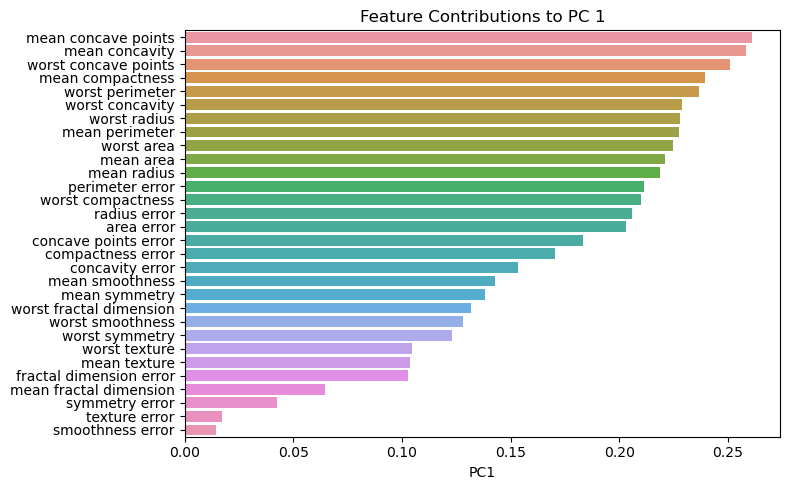

In [16]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1','PC2'], 
                        index=X.columns)

loadings = loadings.sort_values('PC1', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(y=loadings.index, x=loadings['PC1'])
plt.title("Feature Contributions to PC 1")
plt.tight_layout()
plt.show()


In [17]:
loadings

,PC1,PC2
mean concave points,0.260854,-0.034768
mean concavity,0.258400,0.060165
worst concave points,0.250886,-0.008257
mean compactness,0.239285,0.151892
worst perimeter,0.236640,-0.199878
worst concavity,0.228768,0.097964
worst radius,0.227997,-0.219866
mean perimeter,0.227537,-0.215181
worst area,0.224871,-0.219352
mean area,0.220995,-0.231077


### Exercise 4: Compare PCA with t-SNE 

In this exercise we want to compare:
- **PCA** (linear)
- **t-SNE** (non-linear, good for local structure)

Tasks:
1. Compute 2D embeddings for each method using the standardized feature matrix (`X_scaled`).
2. Plot the 2D scatter for each method side-by-side, coloring by the true labels (`y`) to visually compare separation.
3. Discuss differences: Which method gives the most visually separated classes? Which scores are higher? How do runtime and stability compare?
4. (Optional) Try different parameters for TSNE and compare.

*Hints:*
- Use `sklearn.manifold.TSNE` for t-SNE.
- t-SNE has parameters `perplexity` and `n_iter`. Try `perplexity=30`, `n_iter=1000`.


**1. Compute 2D embeddings for each method using the standardized feature matrix (`X_scaled`).**

In [19]:
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_scaled)
print(f"Explained variance ratio (PC1,PC2): {pca.explained_variance_ratio_[:2]}")

Explained variance ratio (PC1,PC2): [0.44272026 0.18971182]


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


**2. Plot the 2D scatter for each method side-by-side, coloring by the true labels (`y`) to visually compare separation.**

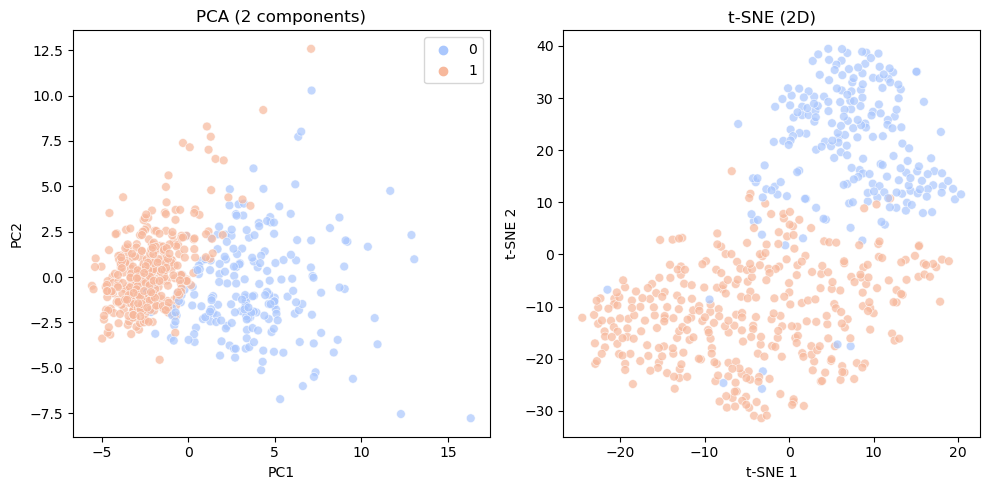

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# PCA plot
ax = axes[0]
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette='coolwarm', alpha=0.7, ax=ax, s=40)
ax.set_title("PCA (2 components)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# t-SNE plot
ax = axes[1]
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='coolwarm', alpha=0.7, ax=ax, s=40, legend=False)
ax.set_title("t-SNE (2D)")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


**4. (Optional) Try different parameters for TSNE and compare.**

/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/claudiaserranocolome/opt/an

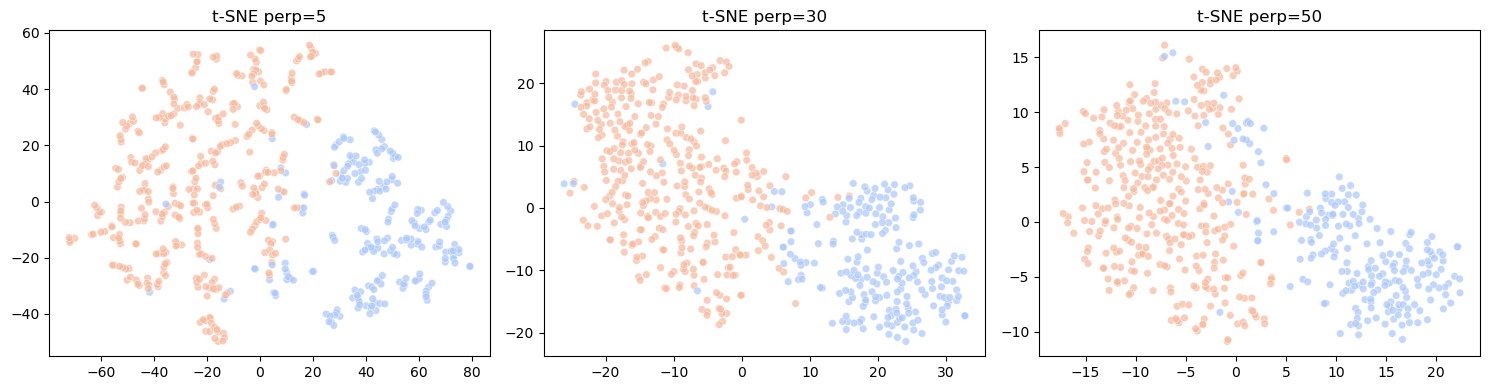

In [25]:
# Example: try different t-SNE perplexities
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(15,4))
for i, perp in enumerate(perplexities):
    tsne_tmp = TSNE(n_components=2, perplexity=perp, n_iter=800, random_state=42, init='pca')
    X_tsne_tmp = tsne_tmp.fit_transform(X_scaled)
    ax = axes[i]
    sns.scatterplot(x=X_tsne_tmp[:,0], y=X_tsne_tmp[:,1], hue=y, palette='coolwarm', alpha=0.7, ax=ax, legend=False, s=30)
    ax.set_title(f"t-SNE perp={perp}")
plt.tight_layout()
plt.show()


### (Optional) Exercise 5: Install and compare with UMAP

If you want, you can install umap and run the comparison with the other methods. To install it, try `pip install umap-learn`.

Then:

`reducer = umap.UMAP(n_components=2, random_state=42)`

`X_umap = reducer.fit_transform(X_scaled)`

## Part 2: Clustering

### K-Means Clustering

Now we’ll let an unsupervised algorithm find groups in the data projected by PCA.

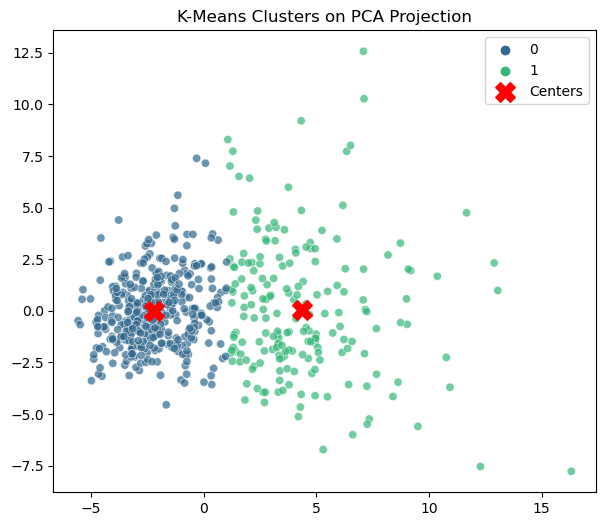

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_kmeans, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c='red', marker='X', label='Centers')
plt.title("K-Means Clusters on PCA Projection")
plt.legend()
plt.show()


### Computing some clustering metrics

In [28]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari = adjusted_rand_score(y, y_kmeans)
sil = silhouette_score(X_pca, y_kmeans)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {sil:.3f}")

Adjusted Rand Index: 0.659
Silhouette Score: 0.508


### Exercise 1: Try different k values for the cluster.

- Loop over k=2...10. Store inertia_ and plot.
- What is the appropriate number of clusters?
- Now try different seeds. How is the cluster stability?

**Loop over k=2...10. Store inertia_ and plot.**

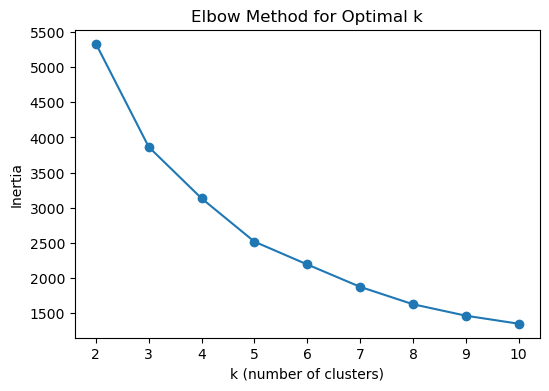

In [49]:
inertias = []
ks = range(2, 11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(ks, inertias, 'o-')
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


**Now try different seeds. How is the cluster stability?**

In [41]:
import numpy as np

scores = []
for seed in range(10):
    km = KMeans(n_clusters=2, random_state=seed, n_init=10)
    labels = km.fit_predict(X_pca)
    scores.append(silhouette_score(X_pca, labels))

print(f"Silhouette mean ± std: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Silhouette mean ± std: 0.508 ± 0.000


In [40]:
import numpy as np

scores = []
for seed in range(10):
    km = KMeans(n_clusters=4, random_state=seed, n_init=1)
    labels = km.fit_predict(X_pca)
    scores.append(silhouette_score(X_pca, labels))

print(f"Silhouette mean ± std: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Silhouette mean ± std: 0.385 ± 0.058


### Exercise 2: Try Hierarchical clustering instead.

- Use `AgglomerativeClustering` with 2 clusters and visualzie the dendrogram.

*Hint:* from sklearn.cluster import AgglomerativeClustering, and from scipy.cluster.hierarchy import linkage, dendrogram

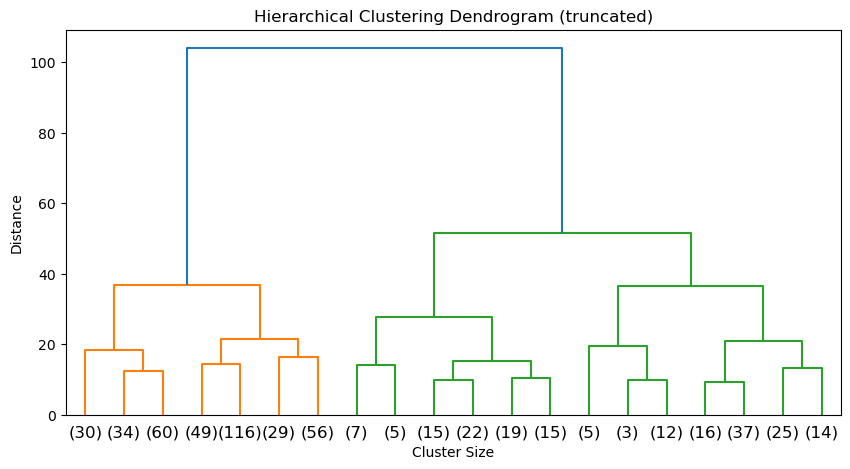

ARI (hierarchical vs true labels): 0.6594271719206948


In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Hierarchical linkage matrix
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Apply clustering
hc = AgglomerativeClustering(n_clusters=2)
y_hc = hc.fit_predict(X_pca)

# Compare with labels
from sklearn.metrics import adjusted_rand_score
print("ARI (hierarchical vs true labels):", adjusted_rand_score(y, y_hc))


### Exercise 3: Exploring Distance Metrics

Most clustering and dimensionality reduction algorithms rely on a *distance* or *similarity* measure to define how close two samples are.

In this exercise, we’ll explore three common metrics:

| Metric | Notes |
|----------|-------|
| **Euclidean** | Standard straight-line distance (default in K-Means) |
| **Manhattan** | Sum of absolute differences (“city block” distance) |
| **Cosine similarity** | Measures *angle* between vectors (scale-invariant) |

You will:
1. Compute pairwise distances between samples.  
2. Visualize how the metric affects clustering using K-Means.  
3. Use t-SNE with custom metrics to show how neighborhood relationships change when using these three different metrics.

**1. Compute pairwise distances between samples.**

In [51]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Select a small subset (for visualization)
subset = X_scaled[:10, :]  # standardized features

# Compute pairwise distances using different metrics
dist_euclidean = pairwise_distances(subset, metric='euclidean')
dist_manhattan = pairwise_distances(subset, metric='manhattan')
dist_cosine = pairwise_distances(subset, metric='cosine')

print("Euclidean distances (first 3x3 block):\n", np.round(dist_euclidean[:3,:3],3))
print("\nManhattan distances (first 3x3 block):\n", np.round(dist_manhattan[:3,:3],3))
print("\nCosine distances (first 3x3 block):\n", np.round(dist_cosine[:3,:3],3))

Euclidean distances (first 3x3 block):
 [[ 0.    10.318  6.778]
 [10.318  0.     5.032]
 [ 6.778  5.032  0.   ]]

Manhattan distances (first 3x3 block):
 [[ 0.    48.3   31.061]
 [48.3    0.    23.069]
 [31.061 23.069  0.   ]]

Cosine distances (first 3x3 block):
 [[0.    0.685 0.19 ]
 [0.685 0.    0.388]
 [0.19  0.388 0.   ]]


**2. Visualize how the metric affects clustering using K-Means.**

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Function to cluster and compute metrics
def cluster_with_metric(metric_name):
    # Compute custom distance matrix
    D = pairwise_distances(X_scaled, metric=metric_name)
    
    # K-Means can’t directly use precomputed distances, so we’ll use it for scoring comparisons
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    
    sil = silhouette_score(D, labels, metric='precomputed')
    ari = adjusted_rand_score(y, labels)
    return sil, ari

metrics = ['euclidean', 'manhattan', 'cosine']
results = []

for m in metrics:
    sil, ari = cluster_with_metric(m)
    results.append((m, sil, ari))

import pandas as pd
res_df = pd.DataFrame(results, columns=['Metric', 'Silhouette', 'ARI'])
res_df


,Metric,Silhouette,ARI
0,euclidean,0.344974,0.670721
1,manhattan,0.384686,0.670721
2,cosine,0.472550,0.670721


**3. Use t-SNE with custom metrics to show how neighborhood relationships change when using these three different metrics.**

/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in

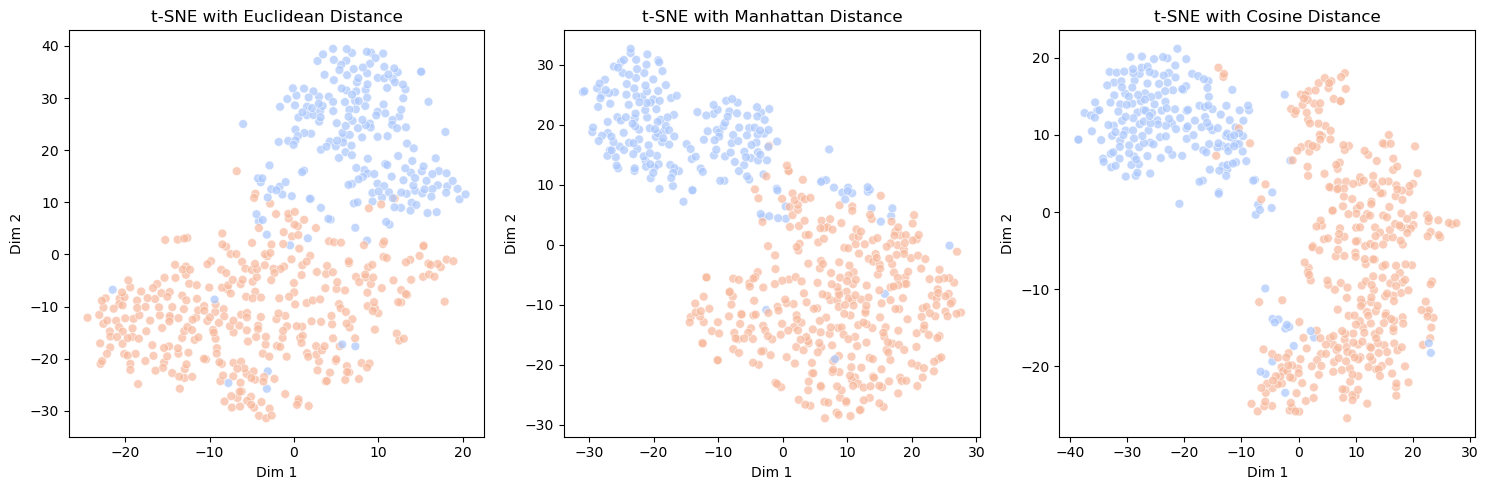

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['euclidean', 'manhattan', 'cosine']

for i, m in enumerate(metrics):
    tsne = TSNE(n_components=2, metric=m, perplexity=30, n_iter=1000, random_state=42)
    X_embedded = tsne.fit_transform(X_scaled)
    
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, palette='coolwarm', alpha=0.7, ax=axes[i], s=40, legend=False)
    axes[i].set_title(f"t-SNE with {m.capitalize()} Distance")
    axes[i].set_xlabel("Dim 1")
    axes[i].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()


### (Optional) Exercise 4: Explore density-based clustering and compare with the approaches we learned today 